In [1]:
import math
from math import sin
from functools import partial
%matplotlib widget
import time
import random

import matplotlib.pyplot as plt
import numpy as np
import sympy
from src.v2.impl.conditions import StepCountCondition, PrecisionCondition, AbsolutePrecisionCondition, \
    EpochCountCondition
from src.v2.impl.function_interpretations import LinearInterpretation, PolynomialInterpretation, LambdaInterpretation
from src.v2.impl.loss_functions import MSE, LineBinary, L1, L2, Elastic
from src.v2.impl.methods import CoordinateDescent, GoldenRatioMethod, NewtonWolfe, GradientDescentBase
from src.v2.impl.metrics import StepCount, CallCount, GradientCallCount, HessianCallCount, PrecisionCount, \
    AbsolutePrecisionCount, AbsolutePrecision, MinAbsolutePrecision, RAMSize, ExecutionTime, EpochCount, \
    OraculValue, LossValue, ResultValue
from src.v2.impl.oraculs import LambdaOracul, SymbolOracul, MinimisingOracul
from src.v2.runner.debug import FULL_DEBUG
from src.v2.runner.runner import Runner, FULL_VISUALIZE, NO_VISUALIZE, FULL_ANIMATION, VISUALIZE, VISUALIZE_FUNCTION
from src.v2.visualization.animation import Animator
from src.v2.runner.runner import TABLE
from src.v2.impl.methods import GradientDescent, ScipyMethod, Newton, NewtonBase
from IPython.display import display, HTML

display(HTML("<style>pre { white-space: pre !important; }</style>"))


def print_points(data):
    for i in data:
        print(i[0] + i[1])


metrics_base = [CallCount(), GradientCallCount(), LossValue()]

minPrec = 1e-5
defPrec = 1e-9
maxPrec = 1e-11

animations = [Animator()]

conditions = [EpochCountCondition(50)]

modules = ([ExecutionTime()]
           + [RAMSize()]
           + [EpochCount()]
           + metrics_base
           + conditions
           + [Animator()]
           + [ResultValue()]
           )

def seed(val: int = -1):
    if val == -1:
        val = time.time_ns()
    random.seed(val)
    print("SEED:", val)


def noised_data_generator(func, num, begin, end, noise_range):
    res = []
    for i in range(0, num):
        point = random.uniform(begin, end)
        res += [[point, func([point])[-1] + random.uniform(-noise_range, noise_range)]]
    return res



ModuleNotFoundError: No module named 'src'

In [8]:
seed()
point_count = 100
crop_size = 10
noise = 1
diap = 30

def polynomSum(a0:float, a1: float, a2: float, a3: float, a4: float, a5: float, point: np.ndarray) -> np.ndarray:
    x = point[0] / 10
    x5 = a5 * x ** 5  
    x4 = a4 * x ** 4
    x3 = a3 * x ** 3
    x2 = a2 * x ** 2
    x1 = a1 * x 
    x0 = a0
    return np.array([x, x5 + x4 + x3 + x2 + x1 + x0])

coefficients = [3, 10, 5, -9, -1, 0.9]
polynom = partial(polynomSum, *coefficients)

data =  noised_data_generator(polynom, point_count, -diap, diap, noise)

conditions = [EpochCountCondition(30)]
methods = [GradientDescent(learning_rate=1000, aprox_dec=1e-7)]
oraculs = [
    MinimisingOracul(MSE(), LambdaInterpretation(func = polynomSum, eval_dim = 2), data, crop_size),
    
    MinimisingOracul(MSE(), LambdaInterpretation(func = polynomSum, eval_dim = 2), data, 1),
    
    MinimisingOracul(L1(MSE(), 50), LambdaInterpretation(func = polynomSum, eval_dim = 2), data, crop_size),
    MinimisingOracul(L2(MSE(), 10), LambdaInterpretation(func = polynomSum, eval_dim = 2), data, crop_size),
    MinimisingOracul(Elastic(MSE(), 30, 5), LambdaInterpretation(func = polynomSum, eval_dim = 2), data, crop_size)
]

point = np.array([0, 5, -5, 5, -5, 5])

SEED: 1716937081082292300



MinimisingOracul
+---------------------------------------------------+-----------------+---------------+--------------+-------------+---------------------+-------------+---------------------------------------------------------------------------+
| Method name                                       |   ExecutionTime | RAMSize       |   EpochCount |   CallCount |   GradientCallCount |   LossValue | Result                                                                    |
+===================================================+=================+===============+==============+=============+=====================+=============+===========================================================================+
| GradientDescent(1000,GoldenRatioMethod,eps=1e-07) |          24.179 | 0.00390625 Mb |           50 |       25000 |                 500 |     323.278 | [ 3.21221999  1.50439197  0.133895   -3.41869019 -0.26130932  0.30085594] |
+---------------------------------------------------+-------------

D:\Projects\Methods-of-optimizations\venv\lib\site-packages\matplotlib\animation.py:892: UserWarning: Animation was deleted without rendering anything. This is most likely not intended. To prevent deletion, assign the Animation to a variable, e.g. `anim`, that exists until you output the Animation using `plt.show()` or `anim.save()`.
  warnings.warn(


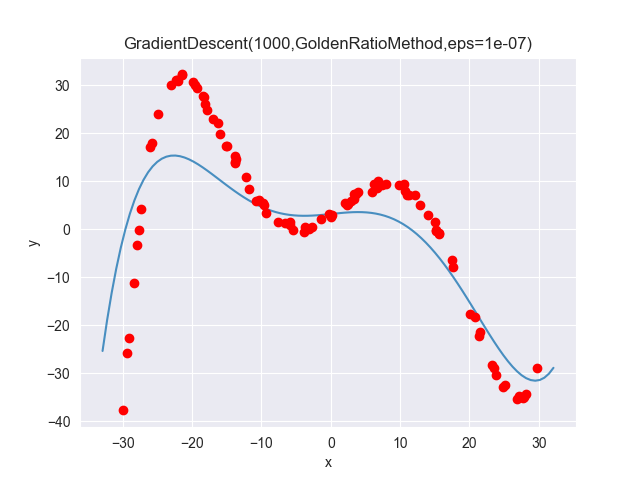

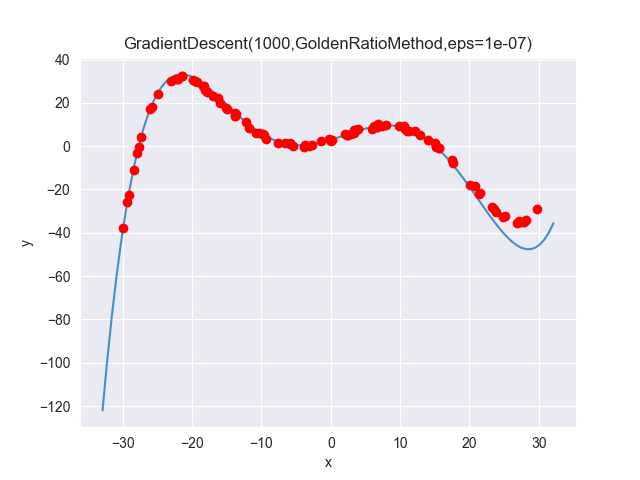

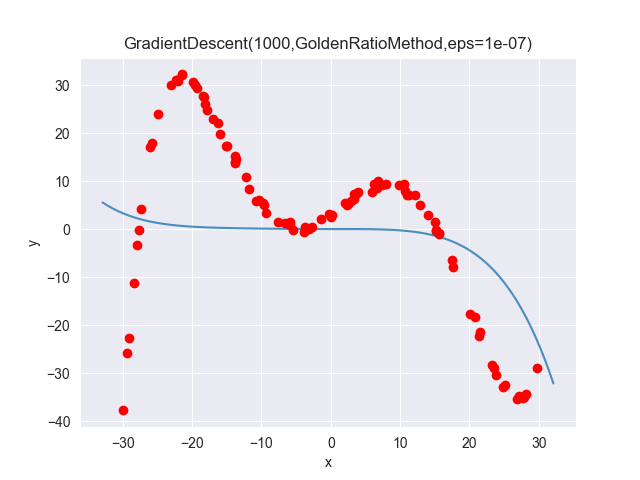

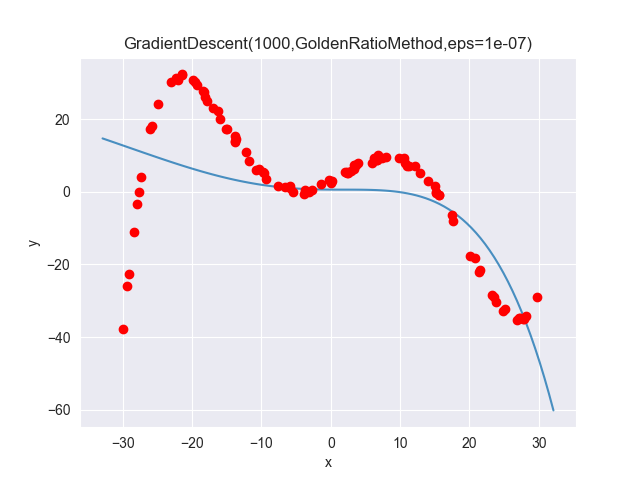

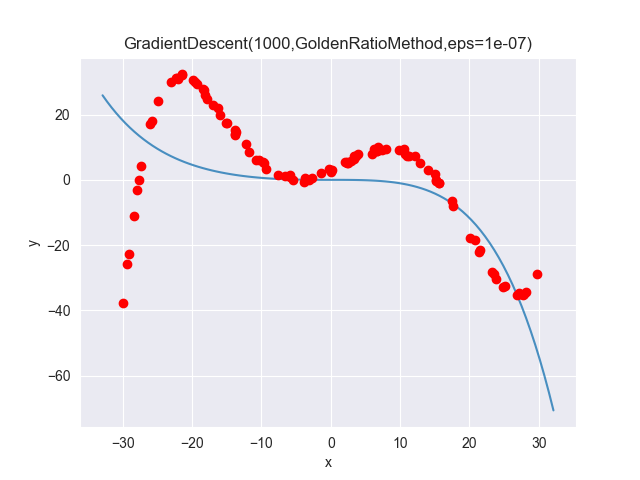

In [9]:
result = Runner.run(methods,
                    oraculs,
                    point,
                    modules, precision=defPrec,
                    # **FULL_DEBUG,
                    **TABLE,
                    **VISUALIZE,
                    # **FULL_VISUALIZE,
                    # **FULL_ANIMATION,
                    **VISUALIZE_FUNCTION
                    )

In [4]:
seed()

point_count = 100
crop_size = 10
noise = 0.05
diap = 5

def waveSum(a: float,b: float,point: np.ndarray) -> np.ndarray:
    x = point[0]
    wave1 = sin(a * x)
    wave2 = sin(b * x)
    return np.array([x, wave1 + wave2])

coefficients = [3, 1]
wave = partial(waveSum, *coefficients)

data = noised_data_generator(wave, point_count, -diap, diap, noise)

methods = [GradientDescent(learning_rate=3, aprox_dec=1e-7)]
oraculs = [
    MinimisingOracul(MSE(), LambdaInterpretation(func = waveSum, eval_dim = 2), data, crop_size),
    MinimisingOracul(MSE(), LambdaInterpretation(func = waveSum, eval_dim = 2), data, 1),

    MinimisingOracul(L1(MSE(), 0.3), LambdaInterpretation(func = waveSum, eval_dim = 2), data, crop_size),
    MinimisingOracul(L2(MSE(), 0.1), LambdaInterpretation(func = waveSum, eval_dim = 2), data, crop_size),
    MinimisingOracul(Elastic(MSE(), 0.15, 0.05), LambdaInterpretation(func = waveSum, eval_dim = 2), data, crop_size),
]

point = np.array([-1, 0])

SEED: 1716934617675046900



MinimisingOracul
+------------------------------------------------+-----------------+---------------+--------------+-------------+---------------------+-------------+---------------------------+
| Method name                                    |   ExecutionTime | RAMSize       |   EpochCount |   CallCount |   GradientCallCount |   LossValue | Result                    |
+================================================+=================+===============+==============+=============+=====================+=============+===========================+
| GradientDescent(3,GoldenRatioMethod,eps=1e-07) |         11.0456 | 0.08984375 Mb |           50 |       19000 |                 500 |     1.52381 | [-9.74223299 43.86611854] |
+------------------------------------------------+-----------------+---------------+--------------+-------------+---------------------+-------------+---------------------------+

MinimisingOracul
+------------------------------------------------+-----------------+------

D:\Projects\Methods-of-optimizations\venv\lib\site-packages\matplotlib\animation.py:892: UserWarning: Animation was deleted without rendering anything. This is most likely not intended. To prevent deletion, assign the Animation to a variable, e.g. `anim`, that exists until you output the Animation using `plt.show()` or `anim.save()`.
  warnings.warn(


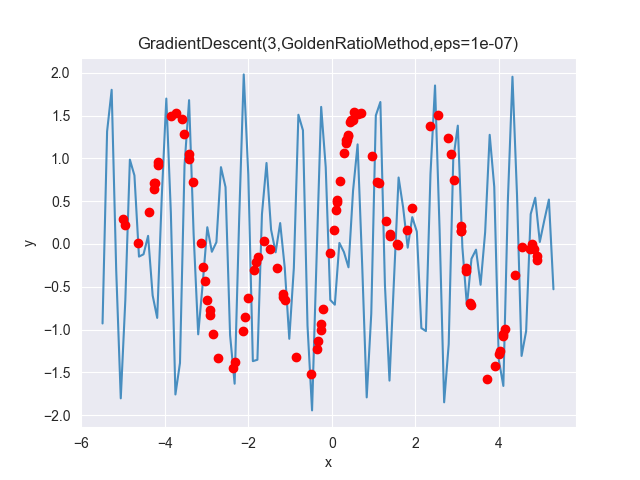

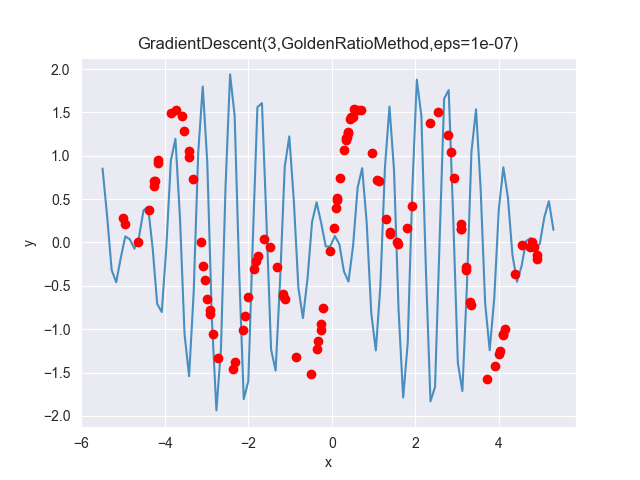

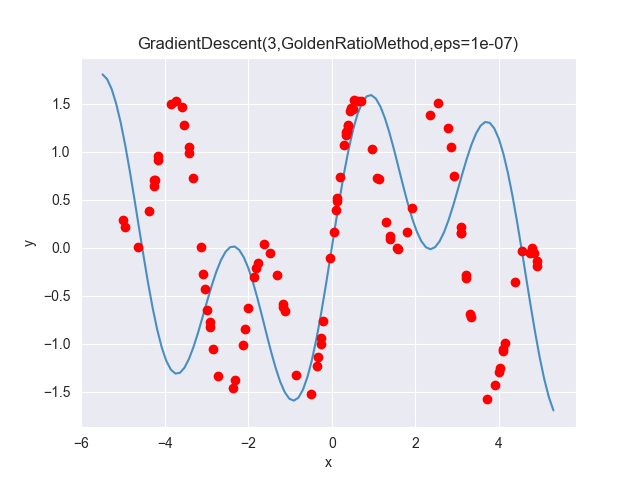

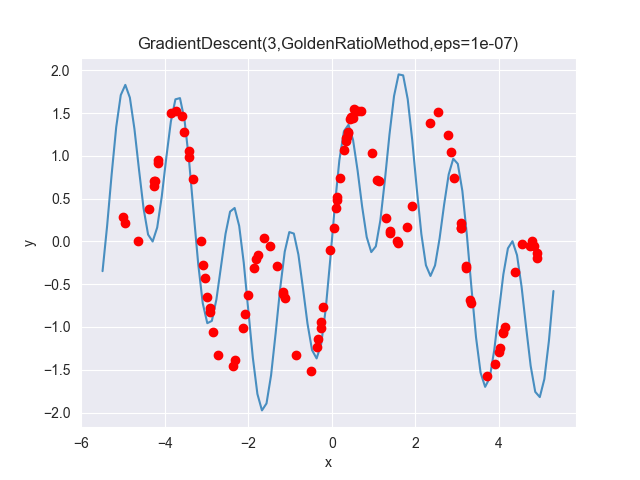

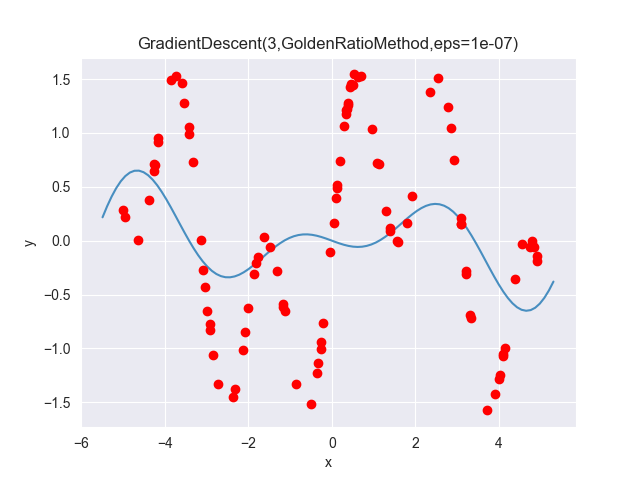

In [5]:
result = Runner.run(methods,
                    oraculs,
                    point,
                    modules, precision=defPrec,
                    # **FULL_DEBUG,
                    **TABLE,
                    **VISUALIZE,
                    # **FULL_VISUALIZE,
                    # **FULL_ANIMATION,
                    **VISUALIZE_FUNCTION
                    )